# 1. Consider the dataset ‘noisy_data.csv’ and apply the following pre-processing techniques and obtain the clean dataset.

– Handling missing values by imputation.

– Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data.

– Apply encodings for categorical variable and scale the features.

# ---------------------------------------------------------------------------------------------------------------

## # Handling Missing Values By Imputation.

In [1]:
import numpy as np                           # Importing Numpy important python library 
import pandas as pd                          # Importing Pandas library 
import matplotlib.pyplot as plt 
import seaborn as sns                        # Importing Seaborn & Matplotlib for Ploting graphs
%matplotlib inline                       

In [2]:
# Fetching Noisy Data Using Pandas.

nd = pd.read_csv('noisy_data.csv')
nd

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


# ---------------------------------------------------------------------------------------------------------------

### # Fetch the Titles of dataset.

In [3]:
nd.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

# ---------------------------------------------------------------------------------------------------------------

### # Shape of dataset.

In [4]:
nd.shape

(10, 4)

### # Explore  Features of dataset.

In [5]:
nd.describe()     # Understanding data.

,Age,Income
count,9.000000,9.000000
mean,43.777778,76533.333333
std,7.693793,14718.695594
min,32.000000,57600.000000
25%,40.000000,64800.000000
50%,43.000000,73200.000000
75%,49.000000,86400.000000
max,55.000000,99600.000000


# ---------------------------------------------------------------------------------------------------------------

## ---} Data type of each features and their information.

In [6]:
nd.info()  # Inorder to check Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


# ---------------------------------------------------------------------------------------------------------------

## ---} Null Data Check in database.

In [7]:
nd.isnull().sum()     # Inorder to check missing value in dataset.

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

# ---------------------------------------------------------------------------------------------------------------

In [8]:
nd.iloc[1]

Region             Brazil
Age                  32.0
Income            57600.0
Online Shopper        Yes
Name: 1, dtype: object

In [9]:
nd.Age.values

array([49., 32., 35., 43., 45., 40., nan, 53., 55., 42.])

In [10]:
#Importing array of Features of datasets.

x = nd.iloc[:,:-1].values

# Importing array of dependent variable

y = nd.iloc[:,-1].values

# ---------------------------------------------------------------------------------------------------------------

## # Missing Data Imputation.

In [11]:
from sklearn.impute import SimpleImputer

# Inorder to replace missing values, creates object of simpleimputer class.

imput = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imput.fit(x[:, 1:3])

# Replacing Missing Values Using Transformation Method.

x[:, 1:3] = imput.transform(x[:, 1:3])

In [12]:
x

array([['India', 49.0, 86400.0],
       ['Brazil', 32.0, 57600.0],
       ['USA', 35.0, 64800.0],
       ['Brazil', 43.0, 73200.0],
       ['USA', 45.0, 76533.33333333333],
       ['India', 40.0, 69600.0],
       ['Brazil', 43.77777777777778, 62400.0],
       ['India', 53.0, 94800.0],
       ['USA', 55.0, 99600.0],
       ['India', 42.0, 80400.0]], dtype=object)

In [13]:
nd['Region'].value_counts()

India     4
Brazil    3
USA       3
Name: Region, dtype: int64

# ---------------------------------------------------------------------------------------------------------------

## # Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data.

### # Normality Test using Shapiro Test method.

In [14]:
# Importing Shapiro test Method 

from scipy.stats import shapiro

# ---------------------------------------------------------------------------------------------------------------

## # Shapiro Test For Income Column.

In [15]:
stat, i = shapiro(nd['Income'])
print('Statistics=%.2f, p=%.2f' % (stat, i))

alpha = 0.05

if i > alpha:
    print(" It's an Normal Sample. ")
else:
    print(" It Does not Look Normal Sample. ")

Statistics=nan, p=1.00
 It's an Normal Sample. 


# ---------------------------------------------------------------------------------------------------------------

## # Shapiro Test For Age Column.

In [16]:
stat, a = shapiro(nd['Age'])
print('Statistics=%.2f, p=%.2f' % (stat, a))

alpha = 0.05

if a > alpha:
    print(" It's an Normal Sample. ")
else:
    print(" It Does not Look Normal Sample. ")

Statistics=nan, p=1.00
 It's an Normal Sample. 


# ---------------------------------------------------------------------------------------------------------------

# # Label Encoder (Encoding Categorical Data).

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [18]:
x

array([[0.0, 1.0, 0.0, 49.0, 86400.0],
       [1.0, 0.0, 0.0, 32.0, 57600.0],
       [0.0, 0.0, 1.0, 35.0, 64800.0],
       [1.0, 0.0, 0.0, 43.0, 73200.0],
       [0.0, 0.0, 1.0, 45.0, 76533.33333333333],
       [0.0, 1.0, 0.0, 40.0, 69600.0],
       [1.0, 0.0, 0.0, 43.77777777777778, 62400.0],
       [0.0, 1.0, 0.0, 53.0, 94800.0],
       [0.0, 0.0, 1.0, 55.0, 99600.0],
       [0.0, 1.0, 0.0, 42.0, 80400.0]], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

In [20]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# ---------------------------------------------------------------------------------------------------------------

# 2. Consider the text present in the file ‘wiki.txt’ and Answer the following questions :

– Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’ and ‘word_tokenize()’ from NLTK library. (Note :The tokens should not have stop words and punctuation symbols.
Feel free to decide about the correct list of stop words; e.g., negative words (don’t) could be important for you.
Execute both methods of tokenization along with your code of removing stop words and punctuation.) (10 points)
– Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file. (10 points)
– State the differences observed in the output of tokenization methods. (10 points)

In [21]:
import re
import string
import math

In [22]:
import nltk

In [23]:
#Text data for operations
data = """The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurts?"."""
data

'The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds" wi

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
tokens = nltk.word_tokenize(data)
print("Tokens using word_tokenize: ", tokens)

Tokens using word_tokenize:  ['The', 'history', 'of', 'NLP', 'generally', 'started', 'in', 'the', '1950s', ',', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', '.', 'In', '1950', ',', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Computing', 'Machinery', 'and', 'Intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence.The', 'Georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'Russian', 'sentences', 'into', 'English', '.', 'The', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', ',', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '.', '[', '2', ']', 'However', ',', 'real', 'progress', 'was', 'much', 'slower', ',', 'and', 'after', 'the', 'ALPAC', 'report', 'in', '1966', ',', 'which', 'found', 'that', 'ten-year-long', 'research', 'had', 'failed', 'to', 

In [26]:
tokenizer = nltk.RegexpTokenizer("\w+")
tokens = tokenizer.tokenize(data)
print("Tokens using RegexpTokenizer: ", tokens)

Tokens using RegexpTokenizer:  ['The', 'history', 'of', 'NLP', 'generally', 'started', 'in', 'the', '1950s', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', 'In', '1950', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', 'Computing', 'Machinery', 'and', 'Intelligence', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', 'The', 'Georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'Russian', 'sentences', 'into', 'English', 'The', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '2', 'However', 'real', 'progress', 'was', 'much', 'slower', 'and', 'after', 'the', 'ALPAC', 'report', 'in', '1966', 'which', 'found', 'that', 'ten', 'year', 'long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'expectations', 'funding', 'for', 'mac

In [27]:
years = re.findall(r'\b\d{4}\b',data)

In [28]:
years

['1950', '1954', '1966', '1964', '1966']

# ---------------------------------------------------------------------------------------------------------------

# 3. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home) and answer the following questions :

– Apply the feature selection techniques over the melbourne-housing -dataset namely (20 points):
∗ Correlation
∗ Chi-Square
∗ Mutual-Information
∗ Random Forest feature importance
– Compare the importance of selected features using bar chart (10 points).
– Comment on the results obtained from various feature selection techniques and which is the best and worst feature
selection selection technique on the given dataset (10 points).

In [29]:
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr,mutual_info_classif

In [30]:
md = pd.read_csv('melb_data.csv')
md

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


# ---------------------------------------------------------------------------------------------------------------

### # Lets Drop Data Features which will note be effecting our dataset.

In [31]:
p = md['Postcode']

list=['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname','Lattitude','Longtitude','Postcode']
x= md.drop(list,axis = 1)

x

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,7392.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0
13577,3,1170000.0,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,6380.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0


# ---------------------------------------------------------------------------------------------------------------

## # Missing values replaced with Zero (0). 

In [32]:
x = x.fillna(0)
x

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,0.0,0.0,4019.0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,0.0,0.0,4019.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,4.0,2.0,2.0,652.0,0.0,1981.0,7392.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0
13577,3,1170000.0,6.8,3.0,2.0,4.0,436.0,0.0,1997.0,6380.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0


# ---------------------------------------------------------------------------------------------------------------

## # Ploting Correlation Heat map.

C:\Users\iDeva\AppData\Local\Temp\ipykernel_11508\1712310986.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(md.corr(), annot = True)


Text(0.5, 1.0, 'Heat Map of Melbourne Dataset')

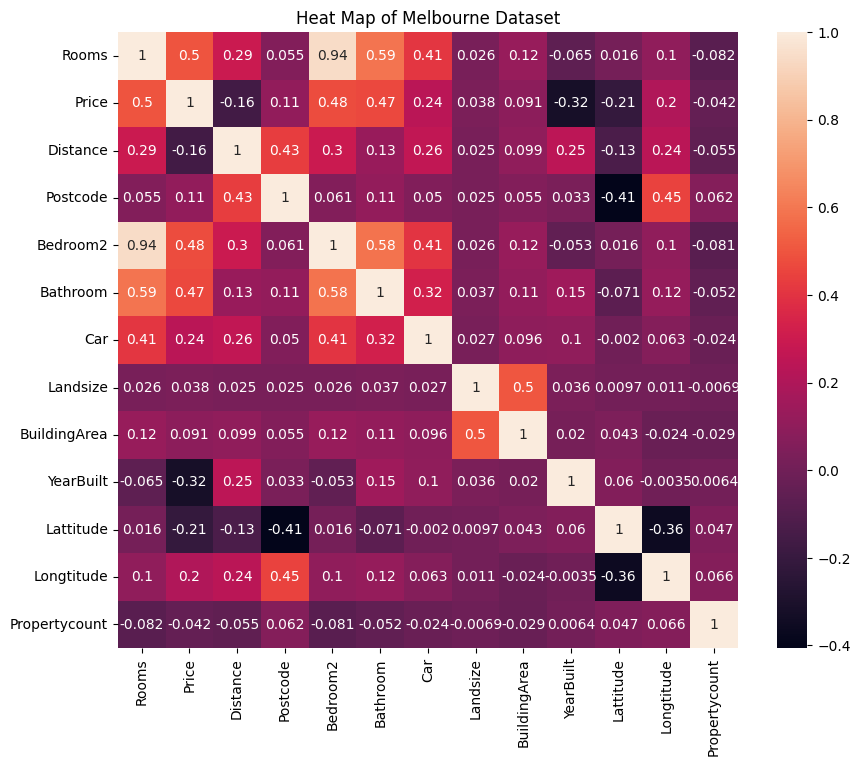

In [33]:
# Using SNS implementing heatmap inorder to check correlation amongs features.
plt.figure(figsize = (10,8))
sns.heatmap(md.corr(), annot = True) 
plt.title('Heat Map of Melbourne Dataset')

# ---------------------------------------------------------------------------------------------------------------

## # Ploting Histogram for Features.

array([[<AxesSubplot: title={'center': 'Rooms'}>,
        <AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Distance'}>,
        <AxesSubplot: title={'center': 'Postcode'}>],
       [<AxesSubplot: title={'center': 'Bedroom2'}>,
        <AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Car'}>,
        <AxesSubplot: title={'center': 'Landsize'}>],
       [<AxesSubplot: title={'center': 'BuildingArea'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'Lattitude'}>,
        <AxesSubplot: title={'center': 'Longtitude'}>],
       [<AxesSubplot: title={'center': 'Propertycount'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

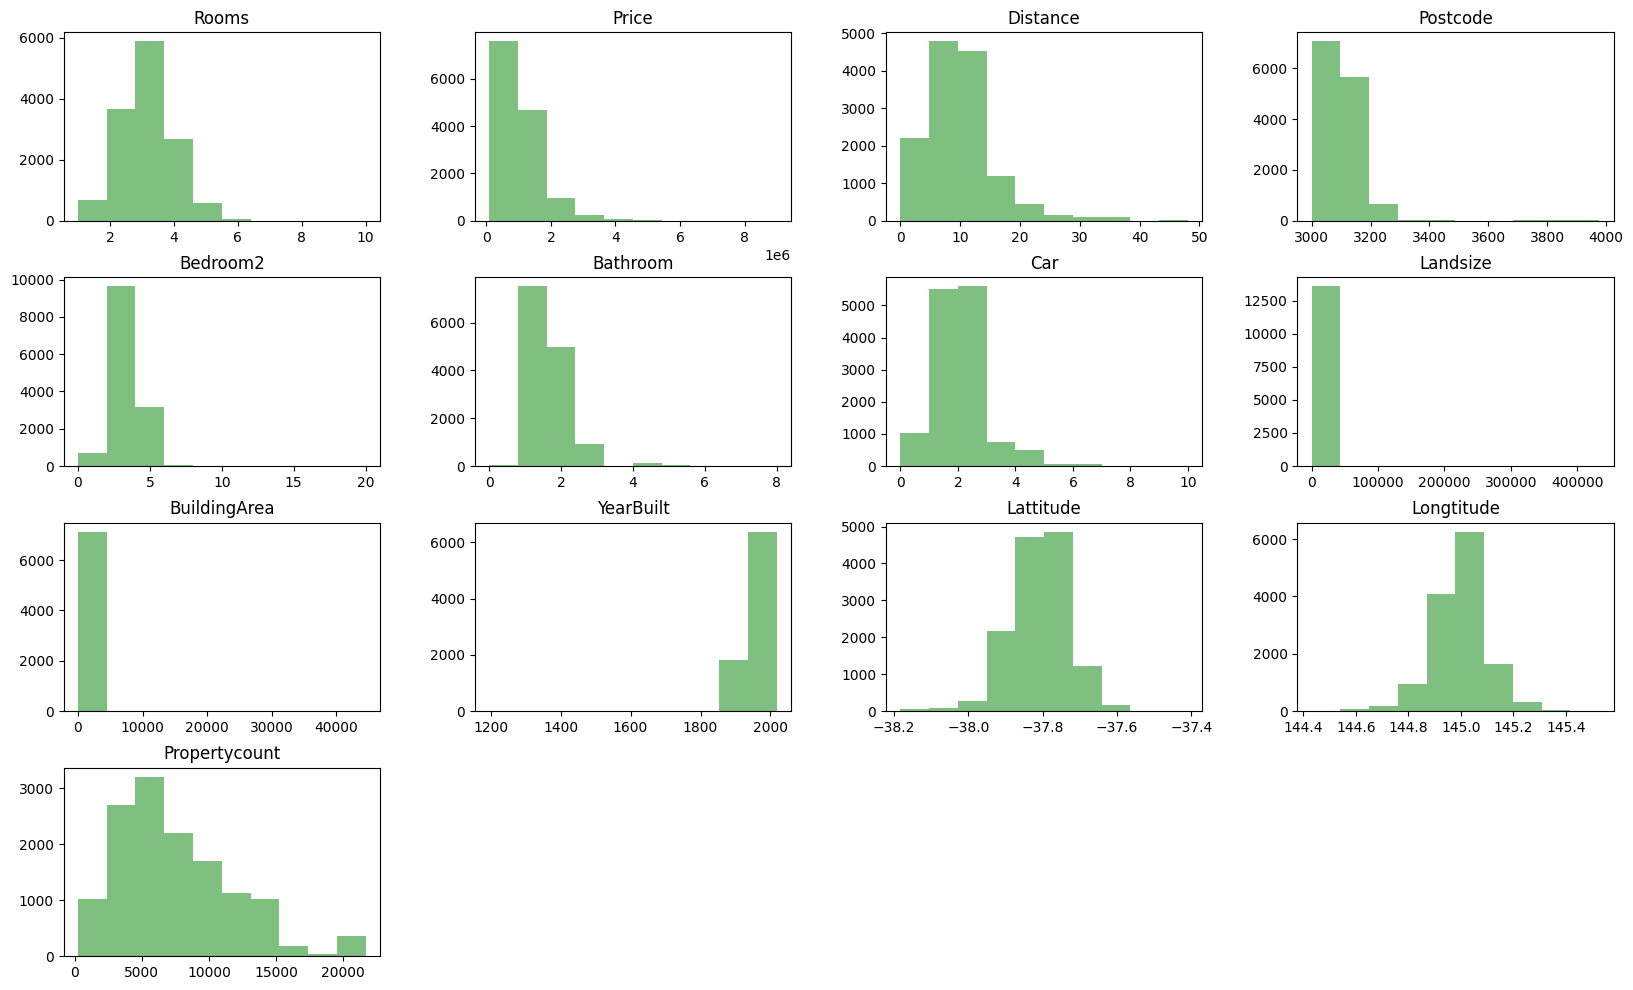

In [34]:
# Ploting histogram of Features from Melbourne dataset.

md.hist( figsize=(20,12), alpha = 0.5, grid = False, bins=10, color='green')

# ---------------------------------------------------------------------------------------------------------------

# # Chi Square.

In [35]:
# Performing Chi Square Technique 

skb = SelectKBest(score_func=chi2, k=7)
n_data = skb.fit_transform(x, p)    # Fitting and transforming data.
n_support = skb.get_support()
chisquare_features = x.columns[n_support]
print('Features of Chi Square  :',chisquare_features)   # Printing each features of technique.

Features of Chi Square  : Index(['Price', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Propertycount'],
      dtype='object')


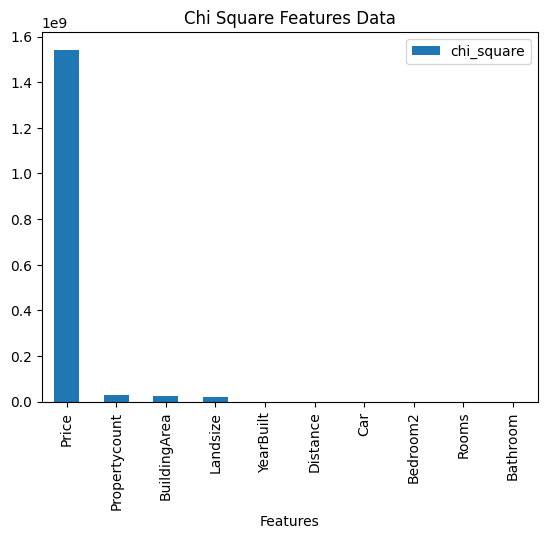

In [36]:
chi2_score,plt_val=chi2(x,p)
f_imp = pd.DataFrame({'Features':x.columns.to_list(),'chi_square':chi2_score})
f_imp.sort_values(by='chi_square', ascending=False, inplace=True)

f_imp.plot(kind='bar', x ='Features', y ='chi_square')     # Ploting Bar plot For Better understanding and analyssis purpose

plt.title('Chi Square Features Data')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# # Performing Random Forest Feature importance.

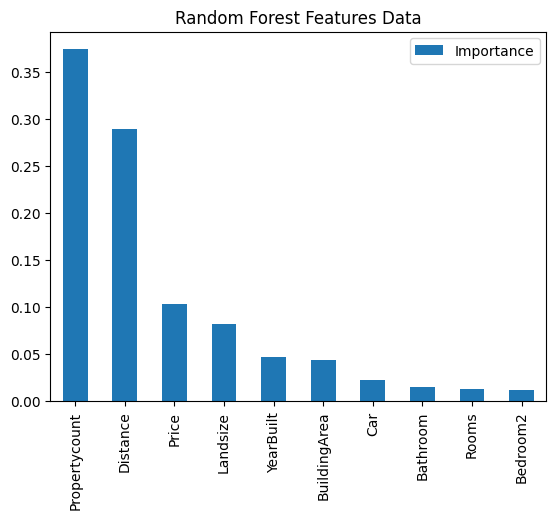

In [37]:
# Importing Random Forest Classifier for understanding Features of data.

rf = RandomForestClassifier( n_estimators=7)    # Taking 7 Estimators for RF model.
modelplt = rf.fit(x,p)     # Fitting the model using datas of x & p.
f_imp = pd.DataFrame(modelplt.feature_importances_, index=x.columns, columns=["Importance"])
f_imp.sort_values(by = 'Importance', ascending=False, inplace=True)
f_imp.plot(kind='bar')    # ploting bar plot for better visualisation and understanding of features.

plt.title('Random Forest Features Data')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# # Performing Mutual Information Technique.

In [38]:
skb = SelectKBest(score_func=chi2, k=7)
n_data = skb.fit_transform(x, p)                           # Fitting and transforming data.
n_support = skb.get_support()
mutinfo_features = x.columns[n_support]
print(' Features of Mutual Information technique =',mutinfo_features)       # Printing each features of technique.

 Features of Mutual Information technique = Index(['Price', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Propertycount'],
      dtype='object')


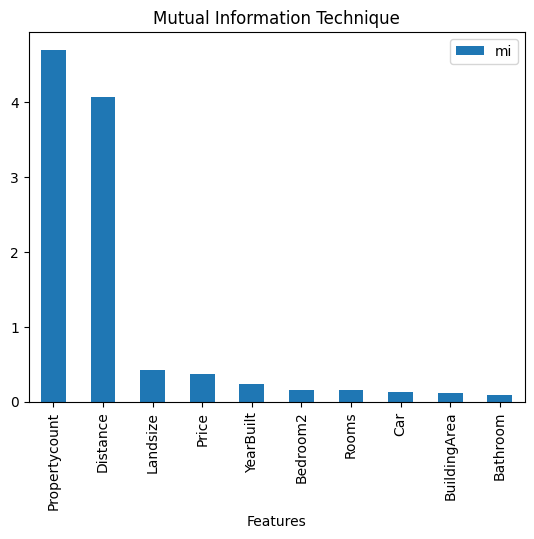

In [39]:
mi = mutual_info_classif(x,p)
f_imp = pd.DataFrame({'Features':x.columns.to_list(),'mi':mi})
f_imp.sort_values(by='mi', ascending=False, inplace=True)
f_imp.plot(kind='bar', x='Features', y ='mi')        # Ploting Bar plot For Better understanding and analyssis purpose

plt.title('Mutual Information Technique')
plt.show()

# ---------------------------------------------------------------------------------------------------------------